# Daten aus Excel einlesen

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

Wenn man Daten anfragt, bekommt man neben .csv auch oft Excel-Files geschickt.
Das einlesen der Daten ist ähnlich wie bei .csvs. 

Zwei Dinge sind zu beachten:
1. Für die Arbeit mit Excel-daten benötigt pandas zusätzlich das Paket 'xlrd. Das muss ggf. noch installiert werden. (Hier ist das schon passiert.)
2. Excel-Files enthalten meist mehrere Tabellenblätter. Beim einlesen musst du angeben, welches Blatt (sheet_name) eingeladen werden soll. 

In [100]:
df_2015 = pd.read_excel("./data/KHV_2015.xlsx", sheet_name = "KHV_2015", skiprows= 4)

In [101]:
df_2015.sample()

,Land,Kreis,Gemeinde,Name1,Name2,Name3,Name4,Straße/Hausnr,PLZ,Ort,Telefonvorwahl/-nummer,Telefaxvorwahl/-nummer,E-Mail Adresse,Internetadresse,Traeger,T_Name1,T_Name2,T_Name3,T_Name4,Art,Betten_Ins,Augen,Chirurgie,CH_Gefäßchir,CH_Thorax,...,K_Kardiologie,K_Neonatologie,Kinderpsychiat,Mund_Kiefer,Neurochir,Neurologie,Nuklear,Ortho,O_Rheuma,Plast_Chir,Psychiat,Psychiat_Sucht,Psychotherapeut,Strahlen,Urologie,Sonst,TN_Innere,TN_I_Geriatrie,TN_Kinderpsychiat,TN_Psychiat,TN_Psychotherapeut,TN_Sonst,TN_SUM,Änd_Art,Änd_Detail
522,5,554,32,Augustahospital,Klinik für Neurologie,NaN,NaN,Augustastr. 8,46419,Isselburg,02874 46-0,02874 46-429,info@augustahospital.de,www.misericordia.de,4,Alexianer Misericordia GmbH,NaN,NaN,NaN,2,94,-,-,-,-,...,-,-,-,-,-,94,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN


In [102]:
df_2015.columns

Index(['Land', 'Kreis', 'Gemeinde', 'Name1', 'Name2', 'Name3', 'Name4',
       'Straße/Hausnr', 'PLZ', 'Ort', 'Telefonvorwahl/-nummer',
       'Telefaxvorwahl/-nummer', 'E-Mail Adresse', 'Internetadresse',
       'Traeger', 'T_Name1', 'T_Name2', 'T_Name3', 'T_Name4', 'Art',
       'Betten_Ins', 'Augen', 'Chirurgie', 'CH_Gefäßchir', 'CH_Thorax',
       'CH_Unfall', 'CH_Viszeral', 'Frauen/Geburt', 'F-Frau', 'F_Geburt',
       'HNO', 'Haut_Geschlecht', 'Herzchir', 'Herz_Thorax', 'Innere',
       'I_Angio', 'I_Endo', 'I_Gastro', 'I_Haema', 'I_Kardio', 'I_Nephro',
       'I_Pneumo', 'I_Rheuma', 'Geriatrie', 'Kinderchir', 'Kinderhk',
       'K_Kardiologie', 'K_Neonatologie', 'Kinderpsychiat', 'Mund_Kiefer',
       'Neurochir', 'Neurologie', 'Nuklear', 'Ortho', 'O_Rheuma', 'Plast_Chir',
       'Psychiat', 'Psychiat_Sucht', 'Psychotherapeut', 'Strahlen', 'Urologie',
       'Sonst', 'TN_Innere', 'TN_I_Geriatrie', 'TN_Kinderpsychiat',
       'TN_Psychiat', 'TN_Psychotherapeut', 'TN_Sonst', 'TN_S

In [103]:
df_2015 = df_2015[['Land', 'Kreis', 'Gemeinde', 'Name1', 'Ort', 'Traeger', 'T_Name1', 'Art', 'Betten_Ins']]

In [104]:
df_2015['Jahr'] = '2015'

In [105]:
df_2015.sample(3)

,Land,Kreis,Gemeinde,Name1,Ort,Traeger,T_Name1,Art,Betten_Ins,Jahr
950,8,127,14,Landkreis Schwäbisch Hall,Crailsheim,1,Landkreis Schwäbisch Hall,2,183,2015
1199,9,162,0,OCM Klinik,München,5,OCM Klinik GmbH,4,15,2015
242,3,360,25,Klinik Veerßen,Uelzen,5,Klinik Veerßen GmbH,2,18,2015


### Übung

### Welche journalistischen Fragen habt ihr an den Datensatz?

Manchmal hilft es, einen Datensatz zu befragen, wie man eine Interview-Partner*in befragt

Welche Fragen habt ihr an den Krankenhäuser-Datensatz? 

#### Fragen gesamt und NRW:

- wieviele Kliniken je Träger gibt es?
- wer sind die größten Klinikbetreiber?
- wieviele Unikliniken sind Privat?
- wieviele Betten privat und öffentlich?

#### Ländervergleich:

- meiste private Träger? 
- Karte: Cluster mit privaten?
- Betten/Einwohner
- Ost/West Vergleich

## Richtig spannend ist der Zeitverlauf

Um einen großen Datensatz zu erzeugen, der Veränderungen über die Jahre preisgibt, müssen wir mehrere Jahre einlesen. 
Problem oft: Je älter die Daten werden, desto größer die Wahrscheinlichkeit, dass sich die Datensätze über die Jahre verändert haben.


Wenn alle .xls-Dateien gleich aufgebaut wären, könnten wir eine Funktion schreiben, die alle Datensätze einliest und miteinander verknüpft.

Schau dir unter ./data mal die 'KHV_' - Dateien an:

- alle beginnen mit 'KHV_', gefolgt vom Jahr
- es gibt drei verschiedene Formate .xls, .XLS, .xlsx
- 1992 heißt das Datenblatt nach dem wir suchen 'KHV'
- 1995 heißt es KH
- 2003 bis 2005 gibt es ein Datenblatt 'KHV', immer als 5. Blatt im Dokument
- 2015 heißt das Datenblatt 'KHV_2015' und ist ebenfalls das 5. Blatt im Dokument

### Die Rohdaten sind lava!
Die Versuchung ist groß, mal eben die Ungleichheiten händisch in den Excel-Files zu bereinigen.
Diese Änderungen würden aber unsere Datenquelle verändern und wären nicht dokumentiert, also schwer wiederholbar für die Abnahme oder auch für die Leser*innen.

Entsprechend wählen wir einen halbautomatisierten, dokumentierten Weg im Jupyter Notebook:

### Nice to know

Um auf das Dinge im Betriebssystem zuzugreifen, gibt es das Python Modul `os`

In [106]:
import os

In [107]:
# Alle Dateien anzeigen, die im Ordner 'data' liegen
path = './data'
files = os.listdir(path)
files

['12611-0001_flat.csv',
 'KHV_2003.xls',
 'bearb_eheschliessungen.csv',
 'KHV_2015.xlsx',
 'fictional_persons.json',
 'datenguide-export-Statistik-der-Kaufwerte-für-Bauland-Nordrhein-Westfalen.json',
 '12511-0007_flat.csv',
 'meine_habil.csv',
 'KHV_2004.xls',
 'nrw_data.json',
 'durchschnittsalter_nrw_gemeinden.csv',
 'KHV_2005.xls',
 'datenguide-export-Statistik-der-Kaufwerte-für-Bauland-Nordrhein-Westfalen.csv',
 'nrw_gemeinden.json',
 'KHV_1992.xls',
 'habil.csv',
 'jannes.json',
 'KHV_1995.XLS',
 '.ipynb_checkpoints',
 '21351-0002_flat.csv',
 '61511-01-03-4.csv',
 'eheschliessungen.csv',
 'umfrage_schulleiter.csv']

Um Dateien nach Mustern zu durchsuchen, gibt es das Python Modul `glob`

In [108]:
from glob import glob

In [109]:
# Die Dateien in einer Liste speichern, die mit 'KHV_' anfangen, das Sternchen ersetzt beliebige Zeichen
files_xls = glob('./data/KHV_*')
files_xls.sort()
files_xls

['./data/KHV_1992.xls',
 './data/KHV_1995.XLS',
 './data/KHV_2003.xls',
 './data/KHV_2004.xls',
 './data/KHV_2005.xls',
 './data/KHV_2015.xlsx']

 Mithilfe dieser Dateiliste könnten wir jetzt unsere Funktion schreiben, die jede Datei durchläuft und die entsprechend bereinigten dataframes anlegt. Da die Dateien aber kleine Unterschiede aufweisen, gehen wir jahrweise vor:

#### 1992

In [110]:
df_1992 = pd.read_excel('./data/KHV_1992.xls', dtype='object')

In [111]:
df_1992.sample()

,LAND,REGBEZ,KREIS,GEMEINDE,NAME1,NAME2,NAME3,NAME4,STRASSE,PLZ,ORT,TELEFON,TRAEGER,NAMET1,NAMET2,NAMET3,NAMET4,ART,BETTEN_P,BETTEN_I,AUGEN_P,AUGEN_I,CHIR_P,CHIR_I,C_GEF_P,...,NEUROL_I,NUKLEAR_,NUKLEAR3,ORTH_P,ORTH_I,O_RHEU_P,O_RHEU_I,PSYCH_P,PSYCH_I,P_SUCHT_,P_SUCHT4,PSYSOM_P,PSYSOM_I,STRAHL_P,STRAHL_I,UROL_P,UROL_I,SONST_P,SONST_I,TN_GER,TN_KJPSY,TN_PSYCH,TN_PSYSO,TN_SONST,TN_SUM
653,05,5,62,014,St. Barbara-Hospital,NaN,NaN,NaN,Barbarastraáe 1,45964,Gladbeck,(02043)-2780,2,Katholische Kirchengemeinde,St. Lamberti,NaN,NaN,2,453,453,0,0,130,130,0,...,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,40,0,0,0,0,0,0,0,0


In [112]:
df_1992.columns

Index(['LAND', 'REGBEZ', 'KREIS', 'GEMEINDE', 'NAME1', 'NAME2', 'NAME3',
       'NAME4', 'STRASSE', 'PLZ', 'ORT', 'TELEFON', 'TRAEGER', 'NAMET1',
       'NAMET2', 'NAMET3', 'NAMET4', 'ART', 'BETTEN_P', 'BETTEN_I', 'AUGEN_P',
       'AUGEN_I', 'CHIR_P', 'CHIR_I', 'C_GEF_P', 'C_GEF_I', 'C_KIN_P',
       'C_KIN_I', 'C_PLA_P', 'C_PLA_I', 'C_THOR_P', 'C_THOR_I', 'C_UNF_P',
       'C_UNF_I', 'FRAUEN_P', 'FRAUEN_I', 'F_FRAU_P', 'F_FRAU_I', 'F_GEBURT',
       'F_GEBUR0', 'HNO_P', 'HNO_I', 'HUG_P', 'HUG_I', 'INNERE_P', 'INNERE_I',
       'I_ENDO_P', 'I_ENDO_I', 'I_GAST_P', 'I_GAST_I', 'I_HAEM_P', 'I_HAEM_I',
       'I_KARD_P', 'I_KARD_I', 'I_LUB_P', 'I_LUB_I', 'I_NEPH_P', 'I_NEPH_I',
       'I_RHEUM_', 'I_RHEUM1', 'I_GER_P', 'I_GER_I', 'KINDER_P', 'KINDER_I',
       'KJPSYCH_', 'KJPSYCH2', 'MKG_P', 'MKG_I', 'NEURCH_P', 'NEURCH_I',
       'NEUROL_P', 'NEUROL_I', 'NUKLEAR_', 'NUKLEAR3', 'ORTH_P', 'ORTH_I',
       'O_RHEU_P', 'O_RHEU_I', 'PSYCH_P', 'PSYCH_I', 'P_SUCHT_', 'P_SUCHT4',
       'PSYSOM

In [113]:
# Spalten so umbenennen, das sie dem Standard der späteren Jahre entsprechen
df_1992 = df_1992.rename(columns={'LAND': 'Land', 'KREIS': 'Kreis', 'GEMEINDE': 'Gemeinde', 'NAME1': 'Name1', 'ORT': 'Ort', 'TRAEGER': 'Traeger', 'NAMET1': 'T_Name1', 'ART':'Art', 'BETTEN_I': 'Betten_Ins'})

In [114]:
# Benötigte Spalten auswählen
df_1992 = df_1992[['Land', 'Kreis', 'Gemeinde', 'Name1', 'Ort', 'Traeger', 'T_Name1', 'Art', 'Betten_Ins']]

Es fehlt noch eine Spalte 'Jahr', in der das jeweilige Jahr aus dem Dateinamen eingetragen wird.

### Muster erkennen mit regulären Ausdrücken

Die Jahre können wir automatisch aus den Zahlen in den Dateinamen auslesen. 

Das Modul `re` ermöglicht nach regulären Ausdrücken zu suchen: Zum Beispiel alle Zahlen in einem String zu finden. 

In [115]:
import re

Beispiele für reguläre Ausdrücke (RegEx):

**Regular Expression Character Classes**

| Expression | Explanation |
| --- | --- |
| [ab-d] | One character of: a, b, c, d |
| [^ab-d] | One character except: a, b, c, d |
| [\b] | Backspace character |
| \d | One digit |
| \D | One non-digit |
| \s | One whitespace |
| \S | One non-whitespace |
| \w | One word character |
| \W | One non-word character |

**Regular Expression Quantifiers**

| Expression | Explanation |
| --- | --- |
| \* | 0 or more |
| \+ | 1 or more |
| ? | 0 or 1 |
| {2} | Exactly 2 |
| {2, 5} | Between 2 and 5 |
| {2,} | 2 or more |
| (,5} | Up to 5 |

In [116]:
teststring = 'KHV_1992.xls'

In [117]:
# Mit (\d) findest Du Zahlen in deinem Teststring, das + gibt an, dass wir mehr als eine Zahl suchen.
re.search(r'\d+', teststring).group()

'1992'

In [118]:
# Damit wir nochher mehrere Excel-Dateien auf einmal verarbeiten können, schreiben wir eine Funktion, die jeweils das Jahr zurückgibt:
def get_numbers_from_filename(filename):
    return re.search(r'\d+', filename).group()

In [119]:
# Funktion testweise ausführen
get_numbers_from_filename("KHV_1992.xls")

'1992'

In [120]:
# Spalte 'Jahr' setzen
df_1992["Jahr"] = get_numbers_from_filename("KHV_1992.xls")

In [121]:
df_1992.sample()

,Land,Kreis,Gemeinde,Name1,Ort,Traeger,T_Name1,Art,Betten_Ins,Jahr
614,05,12,000,St. Antonius-Krankenhaus,Bottrop,2,Katholische Kirchengemeinde,2,153,1992


### 1995

Für 1995 müssen wir ähnliche, aber leider nicht exakt dieselben Schritte ausführen:

In [122]:
# Einlesen, diesmal mit sheet_name, da das Blatt, welches wir haben wollen, nicht das erste ist. 
df_1995 = pd.read_excel('./data/KHV_1995.XLS', sheet_name='KH', dtype='object')

In [123]:
# Spalten so umbenennen, das sie dem Standard der späteren Jahre entsprechen
df_1995 = df_1995.rename(columns={'LAND': 'Land', 'KREIS': 'Kreis', 'GEMEINDE': 'Gemeinde', 'NAME1': 'Name1', 'ORT': 'Ort', 'TRAEGER': 'Traeger', 'NAMET1': 'T_Name1', 'ART':'Art', 'BETTEN_I': 'Betten_Ins'})

In [124]:
# Benötigte Spalten auswählen
df_1995 = df_1995[['Land', 'Kreis', 'Gemeinde', 'Name1', 'Ort', 'Traeger', 'T_Name1', 'Art', 'Betten_Ins']]

In [125]:
# Jahr
df_1995["Jahr"] = get_numbers_from_filename("KHV_1995.XLS")

In [126]:
df_1995.sample()

,Land,Kreis,Gemeinde,Name1,Ort,Traeger,T_Name1,Art,Betten_Ins,Jahr
1193,08,19,079,Chirurgische Privatklinik,Waiblingen,3,Dr. W. Kirschner,3,35,1995


### 2003 - 2005

2003 bis 2005 können wir in einem einlesen 

In [127]:
filenames = [
 './data/KHV_2003.xls',
 './data/KHV_2004.xls',
 './data/KHV_2005.xls',]

In [128]:
df_from_each_file = []

for file in filenames:
    data = pd.read_excel(file, sheet_name=4, dtype='object')
    data["Jahr"] = get_numbers_from_filename(file)
    data = data[['Land', 'Kreis', 'Gemeinde', 'Name1', 'Ort', 'Traeger', 'T_Name1', 'Art', 'Betten_Ins', 'Jahr']]
    df_from_each_file.append(data)

Hast Du gemerkt, dass wir diesmal 'sheet_name=4' gesetzt haben?
Das suchst das 5. Datenblatt heraus, denn Python fängt mit dem Zählen bei 0 an.

Um die DataFrames zu verknüpfen nutzen wir `pd.concat`. Die Funktion nimmt eine Liste von Dataframes und klebt sie untereinander. Das funktioniert aber nur dann gut, wenn die Spaltennamen übereinstimmen.

In [129]:
df_2003_2005 = pd.concat(df_from_each_file, ignore_index=True)

In [130]:
df_2003_2005.sample()

,Land,Kreis,Gemeinde,Name1,Ort,Traeger,T_Name1,Art,Betten_Ins,Jahr
4639,05,111,000,Kliniken der Landeshauptstadt,Düsseldorf,3,Kliniken und Seniorenzentren der,2,284,2005


In [131]:
# Immerhin 6369 Zeilen in einem eingelesen 
len(df_2003_2005)

6369

### Jetzt bringen wir alles zusammen

In [132]:
dfs = [df_1992, df_1995, df_2003_2005, df_2015]

In [133]:
df = pd.concat(dfs, ignore_index=True)

In [134]:
df.shape

(12878, 10)

In [135]:
df.sample()

,Land,Kreis,Gemeinde,Name1,Ort,Traeger,T_Name1,Art,Betten_Ins,Jahr
9394,05,170,020,St. Bernhard-Hospital,Kamp-Lintfort,4,St. Bernhard-Hospital,2,365,2005


## Entwicklung der privaten Träger

In den Excel-Dateien findet sich folgende Erklärung zu den Trägern:

Art des Trägers und Rechtsform des Krankenhauses

1 = öffentlich in öffentlich-rechtlicher Form, rechtlich unselbstständig

2 = öffentlich in öffentlich-rechtlicher Form, rechtlich selbstständig

3 = öffentlich in privatrechtlicher Form

4 = freigemeinnützig

5 = privat


In [137]:
# Wie oft kommt der Wert 5 in der Spalte Träger vor?
df.Traeger.value_counts()
# Typ 5 kommt doppelt vor, das liegt daran, dass die Werte einmal als int und einmal als str vorhanden sind.

4    2483
1    2134
2    1998
5    1570
3    1085
1    1079
3     856
4     669
5     623
2     381
Name: Traeger, dtype: int64

In [139]:
# Datentypen checken
df.dtypes

Land          object
Kreis         object
Gemeinde      object
Name1         object
Ort           object
Traeger       object
T_Name1       object
Art           object
Betten_Ins    object
Jahr          object
dtype: object

In [140]:
# Datentyp für die Spalte Träger zu int ändern
df.Traeger = df.Traeger.astype('int')

In [141]:
# Geklappt?
df.dtypes

Land          object
Kreis         object
Gemeinde      object
Name1         object
Ort           object
Traeger        int64
T_Name1       object
Art           object
Betten_Ins    object
Jahr          object
dtype: object

In [142]:
# Im Datensatz sind private Krankenhäuser mit Träger '5' angegeben. Darauf filtern wir.
df = df[df.Traeger == 5]

In [143]:
df.shape

(2193, 10)

In [144]:
private = df.groupby(['Jahr']).count()
private

,Land,Kreis,Gemeinde,Name1,Ort,Traeger,T_Name1,Art,Betten_Ins
Jahr,,,,,,,,,
2003,512,512,512,512,512,512,507,512,505
2004,525,525,525,525,525,525,524,525,515
2005,533,533,533,533,533,533,533,533,523
2015,623,623,623,623,623,623,623,623,623


Im Jahr 1992 und 1995 gab es noch keine privaten Krankenhäuser.

<AxesSubplot:title={'center':'Entwicklung private Krankenhäuser'}, xlabel='Jahr'>

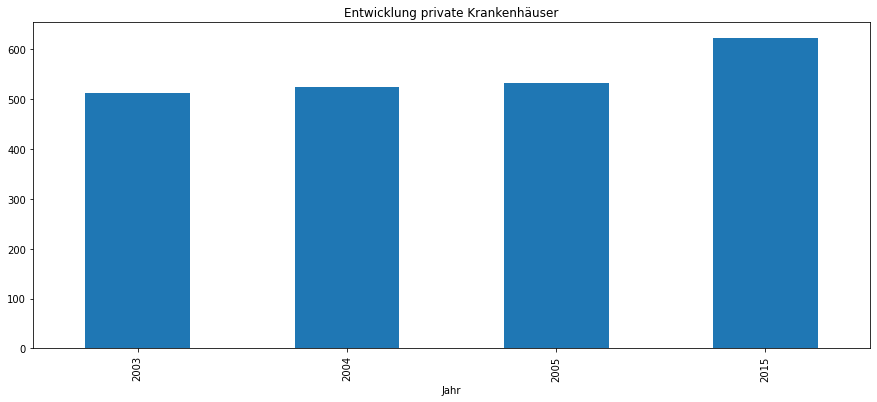

In [146]:
private.plot(y='Land', kind="bar", figsize=(15,6),  legend=False, 
                                           title="Entwicklung private Krankenhäuser",)

Geschafft!

Bitte lies noch das

**[ >> Api Grundlagen Notebook](07_api.ipynb)**